# Include

In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import svm
import seaborn as sns

# Traitement des données

In [2]:
#Récupération des données pour l'entrainement
df_for_train = pd.read_csv('../Donnees/5yDataTrain.csv')

#Récupération des données pour le test
df_for_test = pd.read_csv('../Donnees/1yDataTest.csv')

In [3]:
# Création des dataframe avec deux lignes pour chaque match
# Une ligne avec les statistiques du vainqueur et une avec celles du perdant

def create_match_rows(df):

    columns = ['player_rank', 'player_age', 'player_ace', 'player_df', 'player_svpt', 
               'player_1stIn', 'player_1stWon', 'player_2ndWon', 'player_SvGms', 
               'player_bpSaved', 'player_bpFaced', 'result']

    # DataFrame pour les statistiques du vainqueur
    winner_df = pd.DataFrame(columns = columns)
    winner_df['player_rank'] = df['winner_rank']
    winner_df['player_age'] = df['winner_age']
    winner_df['player_ace'] = df['w_ace']
    winner_df['player_df'] = df['w_df']
    winner_df['player_svpt'] = df['w_svpt']
    winner_df['player_1stIn'] = df['w_1stIn']
    winner_df['player_1stWon'] = df['w_1stWon']
    winner_df['player_2ndWon'] = df['w_2ndWon']
    winner_df['player_SvGms'] = df['w_SvGms']
    winner_df['player_bpSaved'] = df['w_bpSaved']
    winner_df['player_bpFaced'] = df['w_bpFaced']
    winner_df['result'] = 1

    # DataFrame pour les statistiques du perdant
    loser_df = pd.DataFrame(columns = columns)
    loser_df['player_rank'] = df['loser_rank']
    loser_df['player_age'] = df['loser_age']
    loser_df['player_ace'] = df['l_ace']
    loser_df['player_df'] = df['l_df']
    loser_df['player_svpt'] = df['l_svpt']
    loser_df['player_1stIn'] = df['l_1stIn']
    loser_df['player_1stWon'] = df['l_1stWon']
    loser_df['player_2ndWon'] = df['l_2ndWon']
    loser_df['player_SvGms'] = df['l_SvGms']
    loser_df['player_bpSaved'] = df['l_bpSaved']
    loser_df['player_bpFaced'] = df['l_bpFaced']
    loser_df['result'] = 0

    # Concaténation
    final_df = pd.concat([winner_df, loser_df])
    final_df.reset_index(drop=True, inplace=True)
    return final_df

In [4]:
#Création du dataframe pour le train et récupération de ses informations principales
dfTrain = create_match_rows(df_for_train)
print(dfTrain.info())
print(dfTrain.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_rank     28483 non-null  float64
 1   player_age      28665 non-null  float64
 2   player_ace      28678 non-null  float64
 3   player_df       28678 non-null  float64
 4   player_svpt     28678 non-null  float64
 5   player_1stIn    28678 non-null  float64
 6   player_1stWon   28678 non-null  float64
 7   player_2ndWon   28678 non-null  float64
 8   player_SvGms    28678 non-null  float64
 9   player_bpSaved  28678 non-null  float64
 10  player_bpFaced  28678 non-null  float64
 11  result          28678 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 2.6 MB
None
   player_rank  player_age  player_ace  player_df  player_svpt  player_1stIn  \
0         47.0        25.6         9.0        2.0         82.0          49.0   
1         54.0        21.2         5.0       

In [5]:
#Création du dataframe pour le test et récupération de ses informations principales
dfTest = create_match_rows(df_for_test)
print(dfTest.info())
print(dfTest.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_rank     2799 non-null   float64
 1   player_age      2830 non-null   float64
 2   player_ace      2834 non-null   float64
 3   player_df       2834 non-null   float64
 4   player_svpt     2834 non-null   float64
 5   player_1stIn    2834 non-null   float64
 6   player_1stWon   2834 non-null   float64
 7   player_2ndWon   2834 non-null   float64
 8   player_SvGms    2834 non-null   float64
 9   player_bpSaved  2834 non-null   float64
 10  player_bpFaced  2834 non-null   float64
 11  result          2834 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 265.8 KB
None
   player_rank  player_age  player_ace  player_df  player_svpt  player_1stIn  \
0         14.0        32.6         8.0        2.0         74.0          52.0   
1          8.0        20.6         7.0       

In [39]:
from sklearn.utils import shuffle

# Mélange des données
dfTrain = shuffle(dfTrain, random_state=42)
dfTest = shuffle(dfTest, random_state=42)

      player_rank  player_age  player_ace  player_df  player_svpt  \
2089         63.0        23.3         3.0        3.0         51.0   
2806          NaN         NaN         0.0        3.0         49.0   
1146        111.0        19.2         2.0        4.0        136.0   
1110         22.0        25.6         4.0        3.0         72.0   
196          25.0        33.7        25.0        4.0        177.0   

      player_1stIn  player_1stWon  player_2ndWon  player_SvGms  \
2089          29.0           18.0            7.0           7.0   
2806          30.0           14.0            9.0           8.0   
1146          97.0           68.0           20.0          16.0   
1110          55.0           39.0            7.0          10.0   
196          107.0           82.0           33.0          25.0   

      player_bpSaved  player_bpFaced  result  
2089             3.0             7.0       0  
2806             2.0             6.0       0  
1146            11.0            13.0       1  


# Statistiques

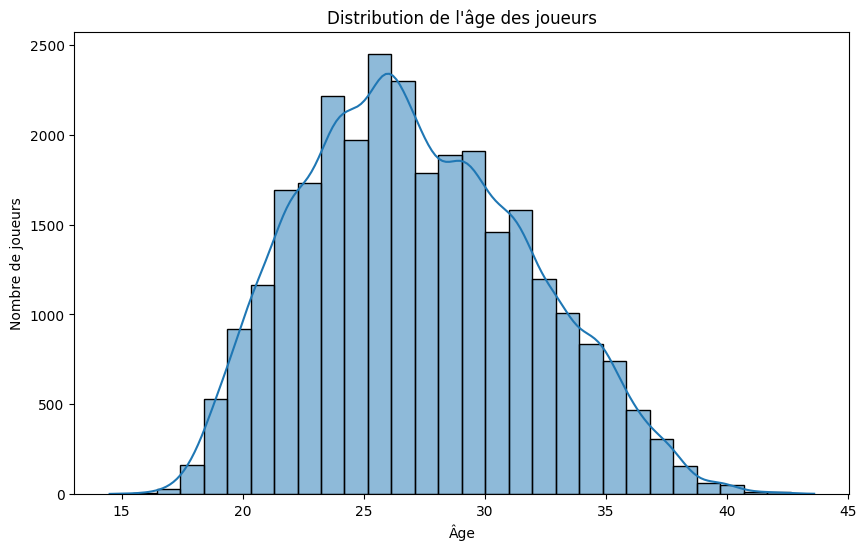

In [60]:
# Création d'un histogramme pour la distribution de l'âge des joueurs
plt.figure(figsize=(10, 6))
sns.histplot(dfTrain['player_age'], bins=30, kde=True)

plt.title('Distribution de l\'âge des joueurs')
plt.xlabel('Âge')
plt.ylabel('Nombre de joueurs')

plt.show()

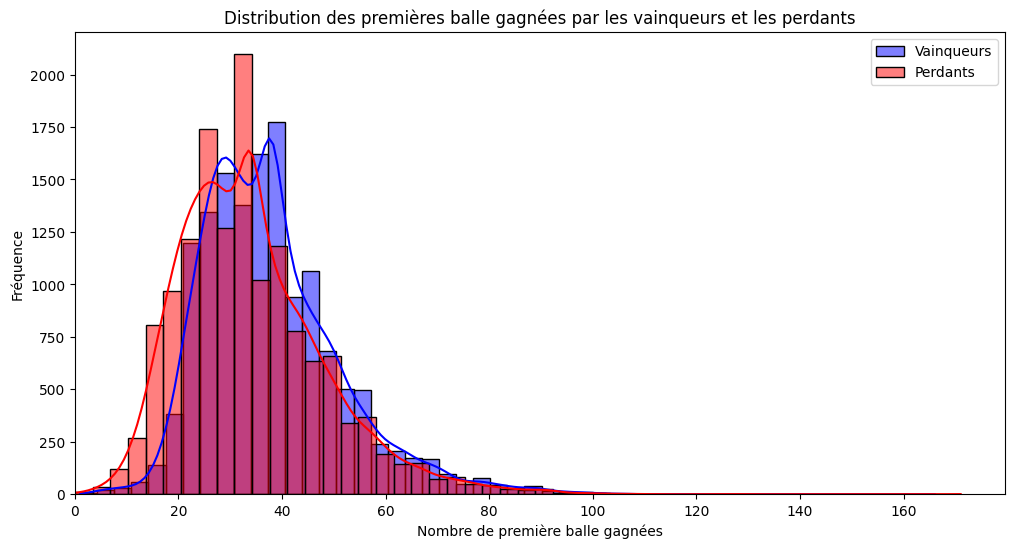

In [61]:
# Création d'un histogramme pour la distribution des aces des vainqueurs et des perdants
plt.figure(figsize=(12, 6))
sns.histplot(data=dfTrain[dfTrain['result'] == 1], x='player_1stWon', kde=True, label='Vainqueurs', color='blue', bins=50)
sns.histplot(data=dfTrain[dfTrain['result'] == 0], x='player_1stWon', kde=True, label='Perdants', color='red', bins=50)

plt.legend()
plt.title('Distribution des premières balle gagnées par les vainqueurs et les perdants')
plt.xlabel('Nombre de première balle gagnées')
plt.ylabel('Fréquence')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

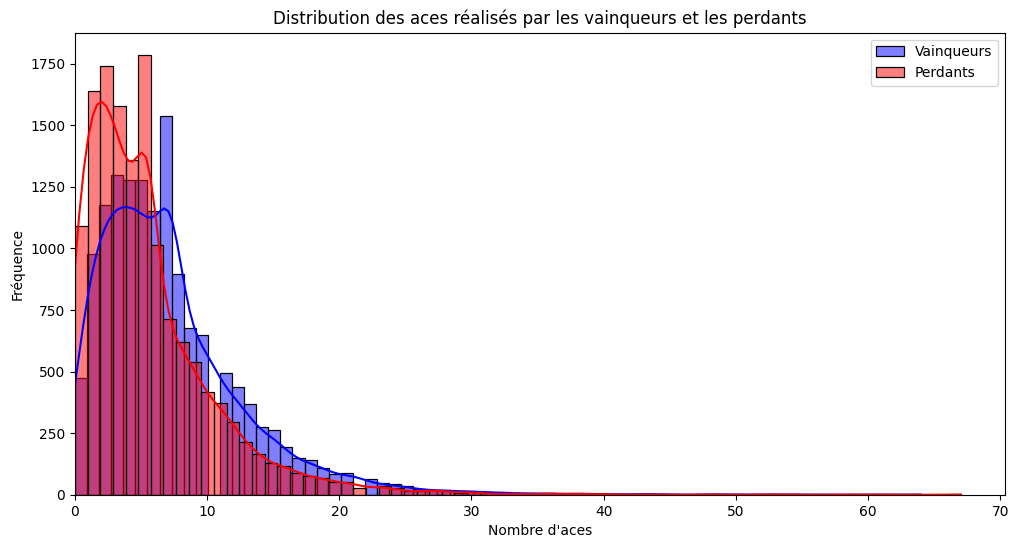

In [62]:
# Création d'un histogramme pour la distribution des aces des vainqueurs et des perdants
plt.figure(figsize=(12, 6))
sns.histplot(data=dfTrain[dfTrain['result'] == 1], x='player_ace', kde=True, label='Vainqueurs', color='blue', bins=70)
sns.histplot(data=dfTrain[dfTrain['result'] == 0], x='player_ace', kde=True, label='Perdants', color='red', bins=70)

plt.legend()
plt.title('Distribution des aces réalisés par les vainqueurs et les perdants')
plt.xlabel('Nombre d\'aces')
plt.ylabel('Fréquence')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

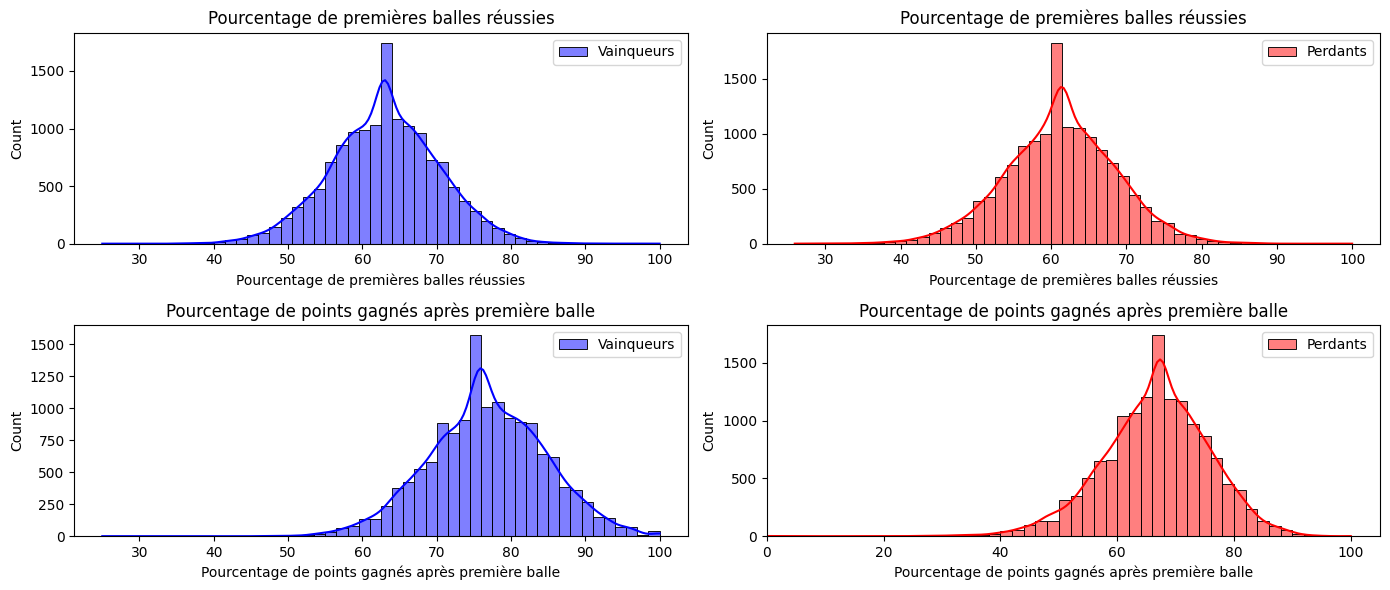

In [63]:
plt.figure(figsize=(14, 6))

# Histogramme pour le pourcentage des premières balles réussies par les vainqueurs
plt.subplot(2, 2, 1)
sns.histplot(data = dfTrain[dfTrain['result'] == 1], x = dfTrain[dfTrain['result'] == 1]['player_1stIn'] / dfTrain[dfTrain['result'] == 1]['player_svpt'] * 100, bins=50, kde=True, color='blue', label='Vainqueurs')
plt.title('Pourcentage de premières balles réussies')
plt.xlabel('Pourcentage de premières balles réussies')
plt.legend()

# Histogramme pour le pourcentage des premières balles réussies par les perdants
plt.subplot(2, 2, 2)
sns.histplot(data = dfTrain[dfTrain['result'] == 0], x = dfTrain[dfTrain['result'] == 0]['player_1stIn'] / dfTrain[dfTrain['result'] == 0]['player_svpt'] * 100, bins=50, kde=True, color='red', label='Perdants')
plt.title('Pourcentage de premières balles réussies')
plt.xlabel('Pourcentage de premières balles réussies')
plt.legend()

# Histogramme pour le pourcentage des points gagnés après première balle par les vainqueurs
plt.subplot(2, 2, 3)
sns.histplot(data = dfTrain[dfTrain['result'] == 1], x = dfTrain[dfTrain['result'] == 1]['player_1stWon'] / dfTrain[dfTrain['result'] == 1]['player_1stIn'] * 100, bins=50, kde=True, color='blue', label='Vainqueurs')
plt.title('Pourcentage de points gagnés après première balle')
plt.xlabel('Pourcentage de points gagnés après première balle')
plt.legend()

# Histogramme pour le pourcentage des points gagnés après première balle par les perdants
plt.subplot(2, 2, 4)
sns.histplot(data = dfTrain[dfTrain['result'] == 0], x = dfTrain[dfTrain['result'] == 0]['player_1stWon'] / dfTrain[dfTrain['result'] == 0]['player_1stIn'] * 100, bins=50, kde=True, color='red', label='Perdants')
plt.title('Pourcentage de points gagnés après première balle')
plt.xlabel('Pourcentage de points gagnés après première balle')
plt.legend()

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

# Création du modèle de prédiction

### Forêt aléatoire

In [64]:
from sklearn.ensemble import RandomForestClassifier

features = ['player_rank', 'player_age', 'player_ace', 'player_df', 'player_svpt', 
            'player_1stIn', 'player_1stWon', 'player_2ndWon', 'player_SvGms', 
            'player_bpSaved', 'player_bpFaced']

target = ['result']

X_train = dfTrain[features]
Y_train = dfTrain[target].values.ravel()

X_test = dfTest[features]
Y_test = dfTest[target].values.ravel()

RFmodel = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth = 20)
RFmodel.fit(X_train, Y_train)
y_pred = RFmodel.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Précision sur le jeu de test : {accuracy*100:.2f}%')

Précision sur le jeu de test : 79.71%


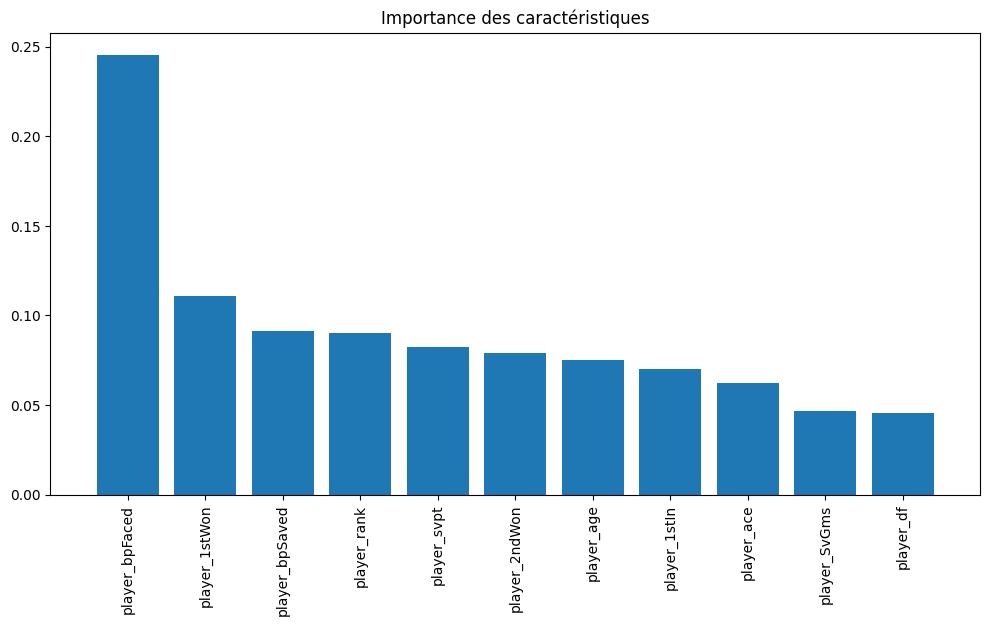

In [57]:
importances = RFmodel.feature_importances_
indices = importances.argsort()[::-1]

# Afficher les importances des caractéristiques
plt.figure(figsize=(12, 6))
plt.title('Importance des caractéristiques')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


[[1126  291]
 [ 284 1133]]


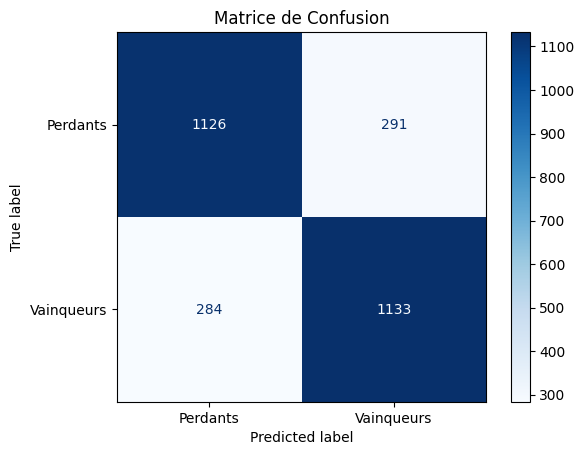

In [59]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

# Afficher la matrice de confusion
ConfusionMatrixDisplay(conf_matrix, display_labels=['Perdants', 'Vainqueurs']).plot(cmap='Blues')
plt.title('Matrice de Confusion')
plt.show()